# Eksperimen - Jupyter

### Oleh:
### - Faza Thirafi (13514033)
### - Ade Surya R (13514049)
### - Drestanto M Dyasputro (13514099)

## Source Code Utama

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.externals import joblib
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

class eksperimen(object):
    def __init__(self, dataset=None, classifier=None, X=None, y=None, dataset_split=None):
        self.dataset = dataset
        self.classifier = classifier
        self.X = X
        self.y = y
        self.dataset_split = dataset_split

    def get_std_dataset(self):
        self.dataset = load_iris()
        self.X = self.dataset['data']
        self.y = self.dataset['target']
#         print(self.X)

    def printmatrix_accuracy_percentage(self):
        predict = self.classifier.predict(self.dataset_split['X_test'])
    
        # accuracy
        print(accuracy_score(self.dataset_split['y_test'],predict))

        # metrics confusion
        print(confusion_matrix(self.dataset_split['y_test'],predict))
    
    def build_clf_percentage(self, clf_name):
        if (clf_name == 'dtl'):
            self.classifier = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)
        elif (clf_name == 'ann'):
            self.classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                                            hidden_layer_sizes=(5, 2), random_state=1)
        # training dengan 90% data   
        self.classifier.fit(self.dataset_split['X_train'],self.dataset_split['y_train'])

    def build_clf_full(self,clf_name):
        if (clf_name == 'dtl'):
            self.classifier = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)
        elif (clf_name == 'ann'):
            self.classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                                            hidden_layer_sizes=(5, 2), random_state=1)
        # training dengan full data   
        self.classifier.fit(self.X,self.y)
        
    def saveModel(self,namaFile):
        joblib.dump(self.classifier,namaFile)
    
    def loadModel(self,namaFile):
        self.classifier= joblib.load(namaFile)
    
    def split_dataset(self):
        # X adalah data setiap fitur, y adalah target 
        # split menjadi 90% training 10% testing
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size = 0.1 ,train_size = 0.9)
        self.dataset_split = {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test
        }

    def get_dataset(self, filename, class_index):
        le = preprocessing.LabelEncoder()
        raw_data = pd.read_csv(filename)
        array_nama_atribut = raw_data.columns
    
        for key in array_nama_atribut:
            list_value = raw_data[key]
            value = []
            for i in list_value:
                value.append(i)
            le.fit(value)
            # save le
            val = le.transform(value)
            raw_data[key] = val
            
        y = [] # target
        for target in raw_data[raw_data.columns[class_index]]: # play is the name of the class index
            y.append(target)
        self.y = y
        X = [] # domain
        i = 0
        jumlah_data = len(raw_data)
        while (i<jumlah_data):
            elem_x = []
            test = 0
            for elem in raw_data.columns:
                if (test != class_index):
                    elem_x.append(raw_data.loc[i, elem])
                test += 1
            X.append(elem_x)
            i += 1
        self.X = X
    
    def get10FoldCrossValidation(self):
        score = cross_val_score(self.classifier, self.X, self.y, cv=10)
        print(score.mean())

    def classifyNewIns(self,ins):
        predict = self.classifier.predict(ins)
        print(predict)
    
def plotting():
        
    iris = sns.load_dataset('iris')
    my_data_frame = pd.DataFrame(iris)
        
    sns.set(style="ticks", color_codes=True) # change style
    g = sns.pairplot(iris, hue="species")
    

exp = eksperimen()


### A. (1) Membaca Dataset Play Tennis (.csv Format)


In [16]:
exp.get_dataset('CencusIncome.data.csv', 5);
print('Dataset\'s data')
print(exp.X);
print()
print('Dataset\'s target')
print(exp.y);


Dataset's data
[[33, 6, 2925, 9, 12, 4, 0, 4, 1, 0, 0, 12, 39, 0], [21, 4, 14085, 11, 8, 6, 1, 4, 1, 0, 0, 39, 39, 0], [36, 4, 15335, 1, 6, 6, 0, 2, 1, 0, 0, 39, 39, 0], [11, 4, 19354, 9, 12, 10, 5, 2, 0, 0, 0, 39, 5, 0], [20, 4, 17699, 12, 13, 4, 5, 4, 0, 0, 0, 39, 39, 0], [32, 4, 8535, 6, 4, 8, 1, 2, 0, 0, 0, 15, 23, 0], [35, 6, 13619, 11, 8, 4, 0, 4, 1, 0, 0, 44, 39, 1], [14, 4, 1318, 12, 13, 10, 1, 4, 0, 105, 0, 49, 39, 1], [25, 4, 8459, 9, 12, 4, 0, 4, 1, 79, 0, 39, 39, 1], [20, 4, 17529, 15, 9, 4, 0, 2, 1, 0, 0, 76, 39, 1], [13, 7, 7076, 9, 12, 10, 0, 1, 1, 0, 0, 39, 19, 1], [6, 4, 5771, 9, 12, 1, 3, 4, 0, 0, 0, 29, 39, 0], [15, 4, 13216, 7, 11, 12, 1, 2, 1, 0, 0, 49, 39, 0], [23, 4, 5721, 8, 10, 3, 0, 1, 1, 0, 0, 39, 0, 1], [17, 4, 15962, 5, 3, 14, 0, 0, 1, 0, 0, 44, 26, 0], [8, 6, 10162, 11, 8, 5, 3, 4, 1, 0, 0, 34, 39, 0], [15, 4, 11256, 11, 8, 7, 4, 4, 1, 0, 0, 39, 39, 0], [21, 4, 314, 1, 6, 12, 0, 4, 1, 0, 0, 49, 39, 0], [26, 6, 17973, 12, 13, 4, 4, 4, 0, 0, 0, 44, 39, 1], [

### A. (2) Membaca Dataset Iris


In [4]:
exp.dataset = None
exp.get_std_dataset();
print(exp.dataset);


{'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
 

### B. (1) Full-Training - DTL


In [4]:
exp.build_clf_full('dtl')

from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(exp.classifier, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
dot_data = tree.export_graphviz(exp.classifier, out_file=None, 
                         feature_names=exp.dataset['feature_names'],  
                         class_names=exp.dataset['target_names'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
# graph = graphviz.Source(dot_data)  


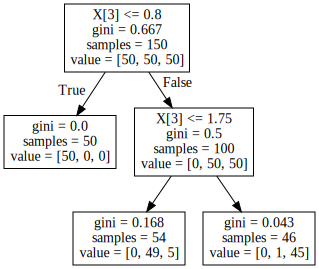

In [5]:
graph

### B. (2) Full-Training - ANN


In [6]:
exp.build_clf_full('ann')
print(exp.classifier.coefs_)

[array([[-0.09325924, -0.08635275, -0.5618231 , -0.68490884, -0.39701224],
       [-0.45817199, -0.34852659, -0.17357481, -0.0765129 ,  0.04362625],
       [-0.09081755, -0.64716082, -0.33216709,  0.00069446, -0.53117064],
       [ 0.19158899, -0.1383977 ,  0.06596169, -0.32025536, -0.33930474],
       [ 0.33800781,  0.49326325, -0.20969318,  0.28310541,  0.42302499],
       [ 0.44349972, -0.47981943, -0.51805784, -0.30291547,  0.42499558],
       [-0.45141931, -0.10166067,  0.51462355,  0.02942681,  0.21565132],
       [-0.20734259,  0.21598035,  0.37608689, -0.52659025,  0.28113801],
       [ 0.54943258,  0.27647172, -0.24675972,  0.33159179, -0.4459356 ],
       [-0.05856264,  0.50704743, -0.23195774, -0.23765527, -0.4158121 ],
       [-0.54018505,  0.16588836, -0.32410211, -0.25874522, -0.00947095],
       [-0.5019773 , -0.04669601, -0.39704291, -0.20859652,  0.22450899],
       [-0.44693764, -0.21862032,  0.21848698,  0.34913531, -0.5058088 ],
       [ 0.04034409,  0.17939517,  0.

### C. (1) Split Training-Testing - DTL


In [17]:
exp.split_dataset()
exp.build_clf_percentage('dtl')
exp.printmatrix_accuracy_percentage()

0.835687960688
[[ 205    0    0    0  196    0   22]
 [   0    0    2    0    0    0    0]
 [   2    0 1508    0   14    0    1]
 [  11    0    0    0   20    0    2]
 [  98    0    0    0  970    0   14]
 [  46    0    0    0   57    0    3]
 [  40    0    0    0    7    0   38]]


### C. (2) Split Training-Testing - ANN


In [8]:
exp.build_clf_percentage('ann')
exp.printmatrix_accuracy_percentage()

0.601658476658
[[   0    0  428    0   43    0    0]
 [   0    0    2    0    0    0    0]
 [   0    0 1296    0  176    0    0]
 [   0    0   37    0    6    0    0]
 [   0    0  395    0  663    0    0]
 [   0    0   84    0   14    0    0]
 [   0    0  111    0    1    0    0]]


### D. (1) 10-fold Cross Validation - DTL


In [9]:
exp.build_clf_full('dtl')
exp.get10FoldCrossValidation()

0.946666666667


### D. (2) 10-fold Cross Validation - ANN

In [10]:
exp.build_clf_full('ann')
exp.get10FoldCrossValidation()

0.333333333333


### E. Save Model


In [11]:
exp.saveModel('model.txt')

### F. Load Model


In [12]:
exp.loadModel('model.txt')

### G. Membuat Instance Baru


In [13]:
new_inst = [ 5.9,  3. ,  5.1,  1.8]

### H. (1) Klasifikasi Instance (G) - DTL


In [14]:
exp.classifyNewIns([new_inst])

[2]


### H. (2) Klasifikasi Instance (G) - ANN

In [15]:
exp.build_clf_full('ann')
exp.classifyNewIns([new_inst])

[2]


### I. Analisis Fitur

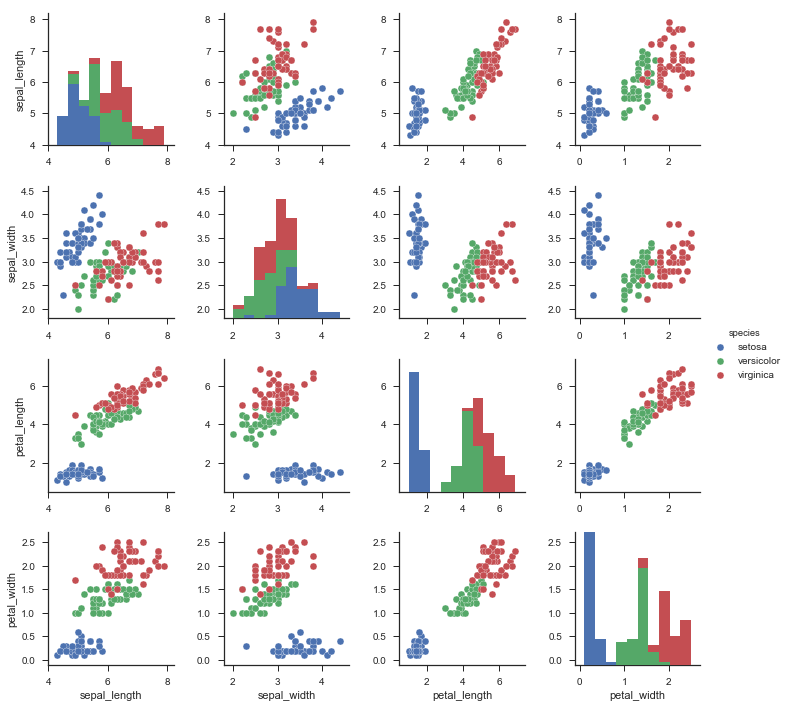

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 

iris = sns.load_dataset('iris')


sns.set(style="ticks", color_codes=True) # change style
g = sns.pairplot(iris, hue="species")